## **Task 4: Visualize Data**
<hr/>

### **0. Import & Install libraries**

In [ ]:
# Install libraries

In [1]:
# Import libraries
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import pandas as pd
from itertools import combinations
## Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<hr/>

### **1. Kết nối và lấy data từ Local MongoDB**

In [3]:
client = MongoClient('mongodb://localhost:27017/')
db = client['T2_PreprocessedData']

In [4]:
# Users Infor
collection = db['Users_Infor']
cursor = collection.find()
data_list = list(cursor)

ui_df = pd.DataFrame(data_list, index = None)
ui_df = ui_df.drop('_id', axis=1, errors='ignore')
ui_df.head()

,user_id,user_name,member_since
0,ur0028288,merrywood,2000-11-01
1,ur0032412,Buckywunder,2000-01-01
2,ur0033913,Sylviastel,2001-01-01
3,ur0035229,Spleen,2001-01-01
4,ur0035641,pk-2,2001-02-01


In [5]:
# Movies Infor
collection = db['Movies_Infor']
cursor = collection.find()
data_list = list(cursor)

mi_df = pd.DataFrame(data_list, index = None)
mi_df = mi_df.drop('_id', axis=1, errors='ignore')
mi_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"['Comedy', 'Drama', 'Family']",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"['Adventure', 'Comedy', 'Drama', 'Romance', 'W...",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,"['Drama', 'Sci-Fi']",1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"['Action', 'Adventure', 'Comedy', 'Drama', 'War']",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"['Comedy', 'Drama', 'Romance']",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0


In [14]:
# Ratings
collection = db['Ratings']
cursor = collection.find()
data_list = list(cursor)

r_df = pd.DataFrame(data_list, index = None)
r_df = r_df.drop('_id', axis=1, errors='ignore')
r_df.head()

,user_id,movie_id,user_rating
0,ur0028288,tt2392830,8.0
1,ur0028288,tt4635282,6.0
2,ur0028288,tt0470752,9.0
3,ur0028288,tt3681794,6.0
4,ur0028288,tt0063442,9.0


<hr/>

### **2. Trực quan hóa dữ liệu (Thống kê)**

#### **2.1. Thống kê: Số lượng phim theo từng thể loại:**

##### 1 thể loại: 

In [ ]:
mi_df.head()

In [10]:
mi_df['genre'] = mi_df['genre'].apply(eval)

In [ ]:
test_df = mi_df.explode('genre')
test_df.head()

In [36]:
c2 = test_df['genre'].value_counts()
c2_df = pd.DataFrame({'genre': c2.index, 'num_film': c2.values})
c2_df

,genre,num_film
0,Drama,1161
1,Thriller,661
2,Comedy,634
3,Action,570
4,Adventure,485
5,Crime,436
6,Mystery,375
7,Sci-Fi,367
8,Horror,336
9,Romance,330


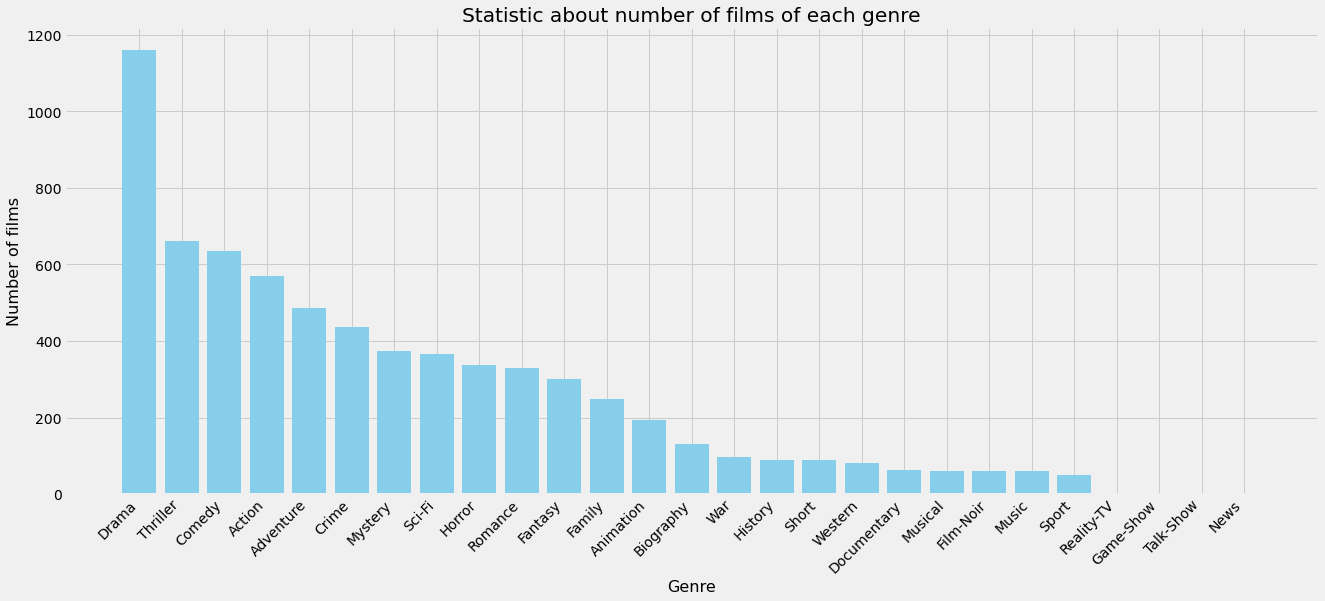

In [47]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(c2_df['genre'], c2_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each genre')
plt.show()

##### 2 thể loại

In [17]:
genre2_df = mi_df.copy()
# Create combinations of two elements from the list
genre2_df['2genres'] = genre2_df['genre'].apply(lambda x: list(combinations(x, 2)))

genre2_df = genre2_df.explode('2genres')
genre2_df = genre2_df['2genres'].value_counts()[:10]
genre2_df = pd.DataFrame({'2 genre': genre2_df.index, 'num_film': genre2_df.values})
genre2_df['2 genre'] = genre2_df['2 genre'].astype(str)
genre2_df

,2 genre,num_film
0,"('Drama', 'Thriller')",353
1,"('Crime', 'Drama')",297
2,"('Action', 'Adventure')",283
3,"('Action', 'Thriller')",267
4,"('Crime', 'Thriller')",255
5,"('Mystery', 'Thriller')",240
6,"('Drama', 'Romance')",234
7,"('Comedy', 'Drama')",228
8,"('Drama', 'Mystery')",227
9,"('Action', 'Sci-Fi')",216


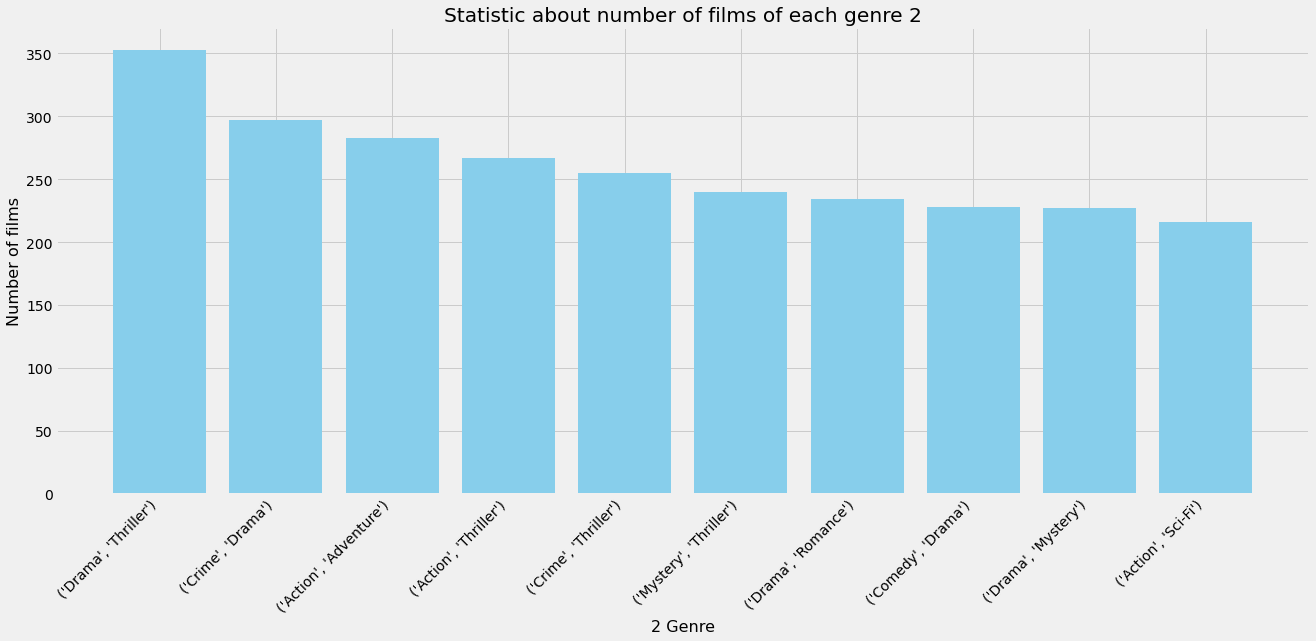

In [18]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(genre2_df['2 genre'], genre2_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('2 Genre',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each genre 2')
plt.show()

<hr/>

### **3. Trực quan hóa dữ liệu (Hệ thống gợi ý)**

##### **3.1. Hệ thống gợi ý: Top n bộ phim theo thể loại**
##### *Filter: 1,2,3 thể loại*

In [ ]:
mi_df.head()

In [51]:
test_df = mi_df.explode('genre')
test_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Comedy,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Drama,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Family,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Adventure,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Comedy,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3


##### **Visualize:**

In [37]:
# Chọn thử Drama và tìm top n bộ phim 
search_string = 'drama'
mask = test_df['genre'].str.lower() == search_string.lower()
t_df = test_df[mask].reset_index()
t_df

,index,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Drama,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Drama,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,Drama,1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,3,tt0017925,The General,After being rejected by the Confederate milita...,4680,Drama,1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,Drama,1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,2182,tt4262980,Shin Godzilla,Japan is plunged into chaos upon the appearanc...,7200,Drama,2016-07-29,Japan,"['Hiroki Hasegawa', 'Yutaka Takenouchi', 'Sato...","['Hideaki Anno', 'Shinji Higuchi']",36022.0,6.8,13,10
1157,2183,tt4272866,The Boy and the Beast,When a young orphaned boy living on the street...,7140,Drama,2015-07-11,Japan,"['Koji Yakusho', 'Aoi Miyazaki', 'Shôta Someta...",['Mamoru Hosoda'],26867.0,7.6,2,7
1158,2184,tt4594834,Chi-Raq,A modern day adaptation of the ancient Greek p...,7620,Drama,2016-12-02,United Kingdom,"['Nick Cannon', 'Teyonah Parris', 'Wesley Snip...",['Spike Lee'],10699.0,5.9,4,14
1159,2187,tt5857720,ReLIFE,"A young man, failing at life, is offered a new...",1440,Drama,2016-07-01,United States,"['Jessie James Grelle', 'Micah Solusod', 'Jean...",[],6411.0,7.8,2,5


In [43]:
sorted_df = t_df.sort_values(by='ratingStar',ascending=False)
a_df = sorted_df[['title', 'ratingStar']]
a_df = a_df[:10]

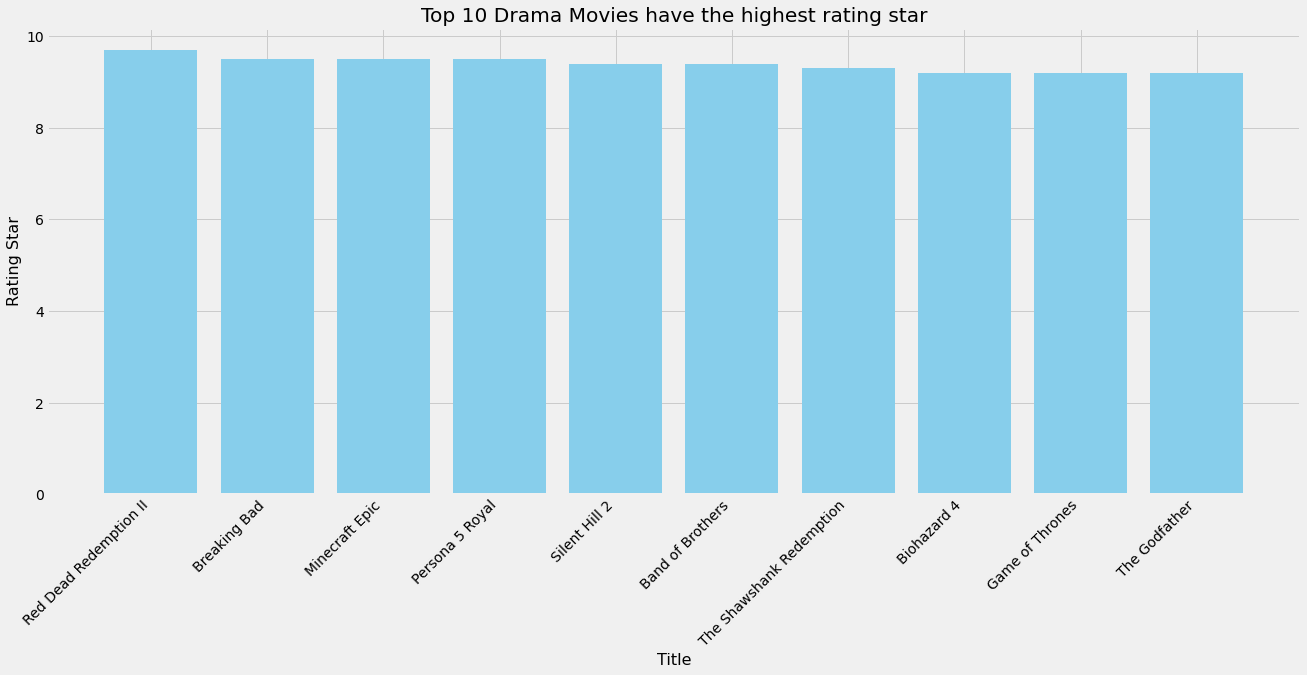

In [44]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(a_df['title'], a_df['ratingStar'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Title',fontsize = 16)
plt.ylabel('Rating Star',fontsize = 16)
plt.title('Top 10 Drama Movies have the highest rating star')
plt.show()

##### **Function:**

In [54]:
def topnmovies_genres(df, search_string):
    mask = df['genre'].str.lower() == search_string.lower()
    g_df = df[mask].reset_index()
    sorted_df =  g_df.sort_values(by='ratingStar',ascending=False)
    a_df = sorted_df[['movie_id', 'title', 'ratingStar']]
    a_df = a_df[:10]

    return a_df[['movie_id', 'title', 'ratingStar']]         

In [55]:
topnmovies_genres(test_df, 'comedy')

,movie_id,title,ratingStar
143,tt10468596,Persona 5 Royal,9.5
452,tt10680606,Minecraft Epic,9.5
427,tt26733316,The sad roblox buly story,9.5
152,tt3944082,Persona 5,9.2
451,tt10306206,A Heist with Markiplier,9.1
314,tt9357776,Wilford 'Motherloving' Warfstache,9.1
195,tt2098220,Hunter x Hunter,9.0
172,tt0388629,One Piece,9.0
159,tt0081912,Only Fools and Horses,9.0
567,tt2297757,Nathan for You,8.9
